# Goals for today
- Continuous limit
- Continuous probability distributions
- Probability density function

# Geometric random variable
- Recall **geometric random variable** $X$
- Integer time steps
- Probability to decay / recover at each time step is $p$

$\mathbb{P}(X = n) = p(1-p)^{n-1}$ for $n = 1,2,...$

# Probability mass function
For a **discrete(-valued) random variable** $X$:
- Define **probability mass function** $f_x$ as

$$f_X(n) := \mathbb{P}[X = n]$$

i.e. the probability that X takes the value $n$

For geometric random variable $X$ we have

$$f_X(n) := p(1-p)^{n-1}$$

Satisfies $\sum_{n=1}^{\infty} f_X(n) = 1$

# Towards continuous time
- suppose want jumps not only at integer times
- Jump at times $t_n := n \infty$ for $ n = 1,2,...$
- e.g if $\delta = \frac{1}{2}$, jump twice per day
- if we want to *reproduce* same dynamics, how shoud we choose decay probability *p*?
- *p* must depend on $\delta$, so call it $p(\delta)$

In order to caompare the two different processes, can't look at instantaneous jumps
- Need to look at **cumulative distribution function**:
$$F_X(n) := \mathbb{P}[X \leq n]$$
- "The probability that have decayed *by time $n$*
- Actually now can talk about any *continuous* (real) time $t$:
$$F_X(t) := \mathbb{P}[X \leq t]$$

How can we write the cumulative distribution function in terms of $f_X$?

- We need to find the largest integer value less then $t$
- We obtain 
$$F_X(t) = \sum_{j=1}^{\lfloor t \rfloor} f_X(j)$$ 
- $\lfloor t \rfloor$ is the **floor** function:
- $\lfloor t \rfloor$ := largest integer $\leq t$ 
- `floor(t)` in Julia

Now think about jumps at times $t_n = n\delta$
- Call resulting process $Y_\delta$
- Also a discrete(-valued) random variable

Its probability mass function is
$$f_{Y_\delta}(n) = p(\delta)[1 - p(\delta)]^{n-1}$$
- This is the probability after $n$ *time-steps*
- But now these *jumps* occur at *times* $n\delta$
- We need $F_{Y_\delta}(t)$
- Probability that $Y_\delta$ has decayed by *time* $t$

## Cumulative distribution of some geometric distribution

Probability that we have recovered at or before time $N$

In [13]:
"""
    plot_cumulative!(p, N, δ = 1) 
 
- `p` is prob to decay at each time step
- `N` is total number of time steps
- `δ` is time between steps
 
Prob mass function is ``f_X(n) = p (1 - p)^{n-1}``
"""
function plot_cumulative!(p, N, δ = 1;label="")
    ps = [p * (1 - p)^(n-1) for n in 1:N]
    cumulative = cumsum(ps)
    
    ys = [0; reduce(vcat, [ [cumulative[n], cumulative[n] ] for n in 1:N])]
    
    pop!(ys)
    pushfirst!(ys, 0)
    
    xs = [0; reduce(vcat, [ [n*δ, n*δ] for n in 1:N ])];
    
    plot!(xs, ys, label="")
    scatter!([n*δ for n in 1:N], cumulative, label=label)
end

plot_cumulative!

In [2]:
?plot_cumulative!

search: plot_cumulative!



```
plot_cumulative!(p, N, δ = 1)
```

  * `p` is prob to decay at each time step
  * `N` is total number of time steps
  * `δ` is time between steps

Prob mass function is $f_X(n) = p (1 - p)^{n-1}$


In [3]:
using Plots

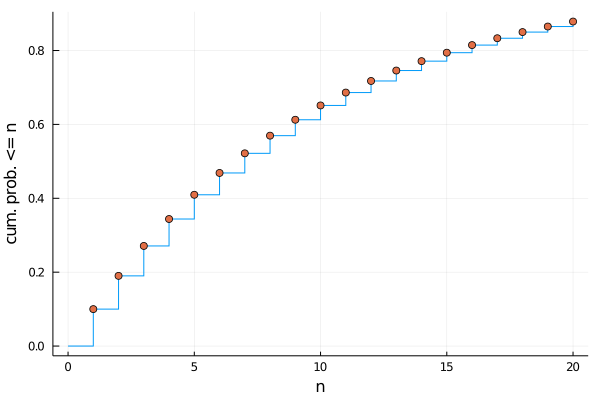

In [4]:
plot_cumulative!(0.1, 20)
xlabel!("n")
ylabel!("cum. prob. <= n")

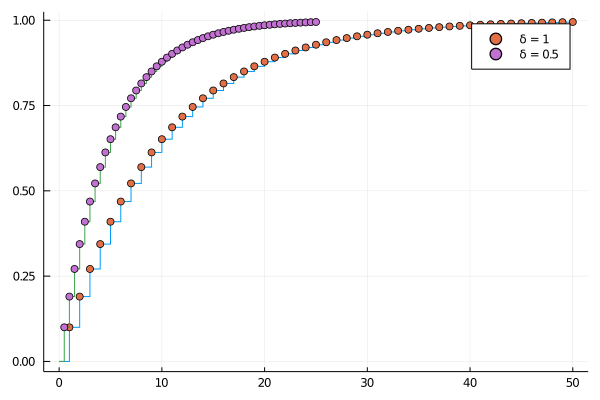

In [18]:
p = 0.1
N = 50
δ = 0.5

plot()
plot_cumulative!(p, N, 1.0, label="δ = 1")
plot_cumulative!(p, N, δ, label="δ = $(δ)")

In [19]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11283549513745776253\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4134278438810833328\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11283549513745776253\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [22]:
p = 0.1
N = 100
δ = 0.5

@manipulate for p₂ in 0.01:0.01:1.0
    plot()
    plot_cumulative!(p, 40, 1.0, label="δ = 1")
    plot_cumulative!(p₂, N, δ, label="δ = $(δ)")
    
    xlims!(0, 40)
    ylims!(0, 1)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["p₂"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/marcon/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/all.js"), Asset("css", nothing, "/home/marcon/.julia/packages/InteractBase/Zfu5P/src/../assets/style.css"), Asset("css", nothing, "/home/marcon/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007face0e23dc0, Task (runnable) @0x00007face0e23dc0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28\",\"0.29\",\"0.3\",\"0.31\"

Cumulative distribution function for geometric random variable $X \sim \text{Geom}(p)$
$$F_X(n) = 1 - (1 - p)^n$$

$$F_{Y_\delta}(n) = 1 - [1 - p(\delta)]^n$$

Fix time $t = n$. Find $p(\delta)$ such that probabilities are the same at time $t$.  
$t = n\delta$  
So $n = t / \delta$

$$1 - [1 - p(\delta)]^{t / \delta} = 1 - (1 - p)^t$$

## Continuous limit
Limit $\delta \to 0$  
Need $p(\delta) \to 0$

If $x$ is small, $1 - x \simeq \exp(-x)$

$$\exp(x) = 1 + x + \frac{1}{2} x^2 + \frac{1}{3!} x^3 + \cdots + \frac{1}{n!} x^n$$

$$\exp(x) = \sum_{n=0}^\infty \frac{1}{n!} x^n$$

Define $\exp$ as the function which is equal to its derivative and suppose that I can write as a power series in $x$

$$1 - [1 - p(\delta)]t/\delta \simeq 1 - \{ \exp[-p(\delta)] \}^{t/\delta}$$

$$1-exp \left[ -p(\delta) \frac{t}{\delta} \right]$$

Need $p(\delta)/\delta \to$ when $\delta \to 0$

End result: $F(t) = 1 - \exp[-\lambda t]$

$\lambda$ is **rate** -- probability per unit time

$$1 - (1 - p)^t$$

Choose $\lambda$ such that $1 - p = exp(-\lambda)$

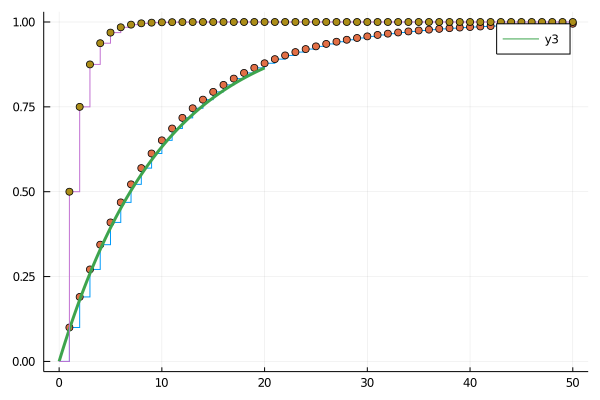

In [32]:
plot()
plot_cumulative!(0.1, 50)

λ =0.1
plot!(0:0.01:20, t -> 1 - exp(-λ*t), lw=3)

p = 0.5
λ = -log(1 - p)
plot_cumulative!(p, 50)

**Exponential random variable** $Z$

$F_Z(t) = \mathbb{P}(Z \le t)$